In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

## 0.1 Generate demand forecast scenario

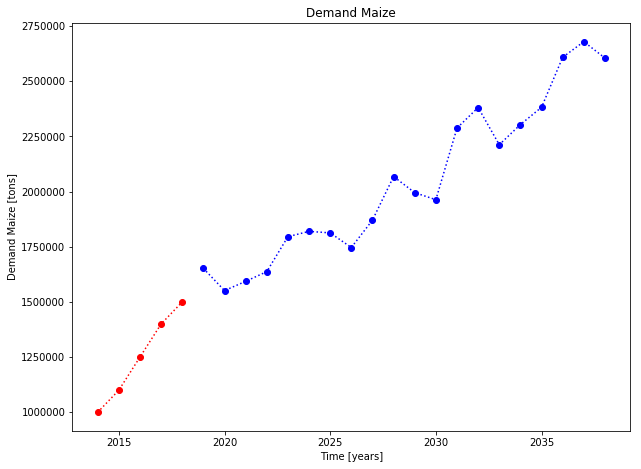

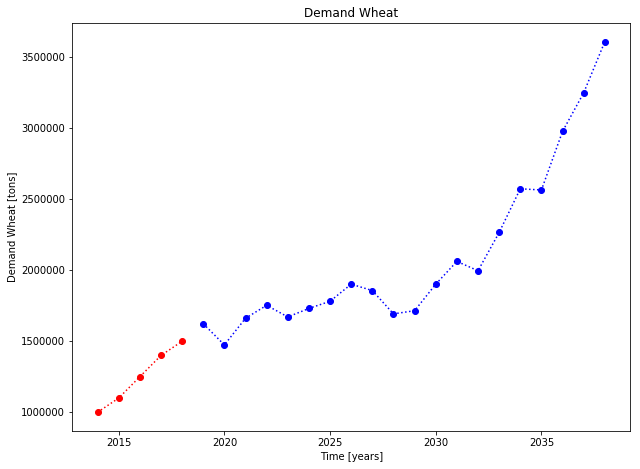

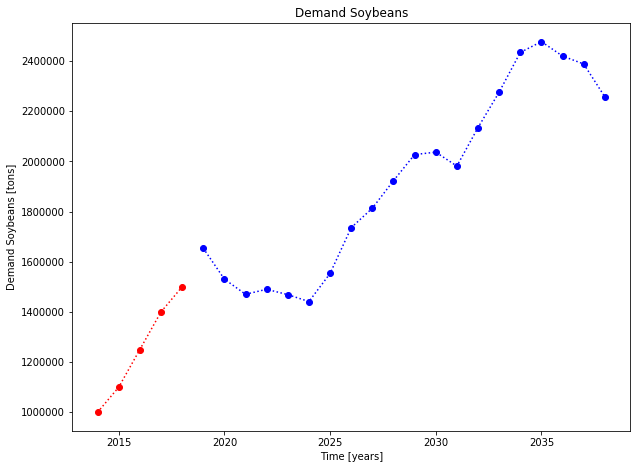

In [2]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random()
wheat.scenario_random()
soybeans.scenario_random()

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [3]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [4]:
# instantiate System object
Terminal = system.System(elements = demand + vessels)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [5]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 107
     Handysize calls: 48
     Handymax calls: 34
     Panamax calls: 25
  Total cargo volume: 4929739
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy (after adding berth): inf
  *** add Quay to elements
     Berth occupancy (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 2.4557425213675215
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 1.2621661324786324
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.8643073361823361
  *** add Berth to elements
     Berth occupancy (after adding berth): 0.8643073361823361
  *** add Quay to elements
     Berth occupancy (after adding qu

## Report all elements

In [6]:
for element in Terminal.elements:
    print("")
    print(element.name)
    print("")
    print(element.__dict__)


Maize

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1652059
1   2020  1551531
2   2021  1593244
3   2022  1637334
4   2023  1795747
5   2024  1819818
6   2025  1812892
7   2026  1746676
8   2027  1870603
9   2028  2068248
10  2029  1995196
11  2030  1963361
12  2031  2288055
13  2032  2381038
14  2033  2212475
15  2034  2303957
16  2035  2382093
17  2036  2608659
18  2037  2679648
19  2038  2605142, 'handling_fee': 3, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Maize', 'id': 'e8415840-48e7-11e9-9fae-60f677ba2ce0'}

Wheat

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1623426
1   2020  1474336
2   2021  1661835
3   2022  1753002
4   2023  1671204
5   2024  1730966
6   2025  1781631
7   2026  1901962
8   2027  1857031
9   2

19  2038         0     241500.0   241500.0  786240.0  2160.0}

Harbour_crane_01

{'triggers': [], 'renevue': [], 'labour': 2160.0, 'maintenance': 241500.0, 'energy': 786240.0, 'insurance': 120750.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 12075000, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 40, 'unit_rate': 10500000, 'mobilisation_perc': 0.15, 'maintenance_perc': 0.02, 'consumption': 210, 'insurance_perc': 0.01, 'crew': 3, 'crane_type': 'Harbour crane', 'lifting_capacity': 40, 'hourly_cycles': 40, 'eff_fact': 0.4, 'payload': 28, 'peak_capacity': 1120, 'effective_capacity': 448, 'year_purchase': [], 'year_online': 2033, 'name': 'Harbour_crane_01', 'id': 'e8c23b30-48e7-11e9-960e-60f677ba2ce0', 'df':     year     capex  maintenance  insurance    energy  labour
0   2019         0          0.0        0.0       0.0     0.0
1   2020         0          0.0        0.0       0.0     0.0
2   2021         0          0.0        0.0       0.0     0.0
3   2022   

## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [7]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [berth, screw],
         [crane, conveyor1],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)